In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
import csv

batch_p_r(dir_containing_preds, scaling, clust_r, cor_r, clip_val=None):

In [5]:
results = 'prelim_results.csv'

In [13]:
p_by_label = {}
r_by_label = {}

with open(results) as f:
    reader = csv.reader(f)
    for row in reader:
        label=row[0]
        scores=row[1:]
        precision = [float(x[1]) for x in enumerate(scores) if x[0] % 2 == 0]
        recall    = [float(x[1]) for x in enumerate(scores) if x[0] % 2 == 1]
        print label
        print precision
        print recall
        p_by_label[label] = precision
        r_by_label[label] = recall

Curb Cut
[18.47, 20.43, 33.74, 62.83, 89.8, 96.18]
[89.82, 87.1, 78.67, 63.62, 48.92, 27.06]
Obstruction
[4.71, 5.04, 7.18, 12.07, 19.45, 28.57]
[85.29, 87.5, 83.82, 69.12, 47.06, 32.35]
Missing Cut
[6.69, 7.79, 12.03, 17.76, 25.48, 20.34]
[76.74, 72.09, 58.91, 44.19, 31.01, 9.3]
Sfc Problem
[9.73, 10.95, 17.21, 28.52, 41.96, 57.14]
[75.48, 69.23, 58.17, 37.02, 22.6, 9.62]
Overall
[10.45, 11.61, 17.76, 30.13, 47.01, 56.05]
[82.64, 81.67, 72.24, 56.55, 41.23, 22.02]


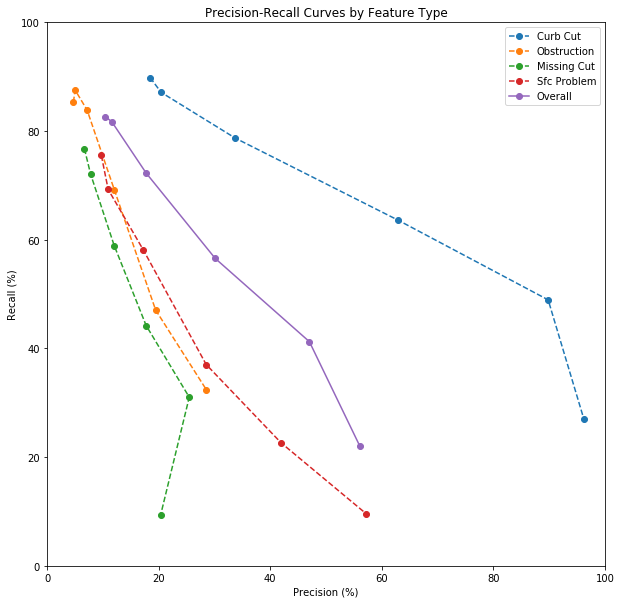

In [25]:
plt.figure(figsize=(10,10))
for label in p_by_label:
    marker = 'o'
    line   = 'dashed' if label != 'Overall' else 'solid'
    plt.plot(p_by_label[label], r_by_label[label], linestyle=line, marker=marker, label=label)
plt.xlabel('Precision (%)')
plt.ylabel('Recall (%)')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("Precision-Recall Curves by Feature Type")
plt.legend()
plt.show()